In [2]:
import keras
import tensorflow as tf

In [3]:
import sys
print(sys.version)
print(keras.__version__)
print(tf.__version__)

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
2.2.2
1.10.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

![](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

** More on autoencoders in Keras **

[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)

[Автоэнкодеры в Keras, Части 1-6](https://habrahabr.ru/post/331382/)

### MNIST data

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [7]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### FNN autoencoder

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [10]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [11]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.3578 - val_loss: 0.2702
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.2616 - val_loss: 0.2492
Epoch 3/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2382 - val_loss: 0.2256
Epoch 4/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.2189 - val_loss: 0.2097
Epoch 5/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2054 - val_loss: 0.1981
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1948 - val_loss: 0.1887
Epoch 7/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1862 - val_loss: 0.1811
Epoch 8/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.1792 - val_loss: 0.1747
Epoch 9/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1733 - val_loss: 0.1694
Epoch

In [13]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

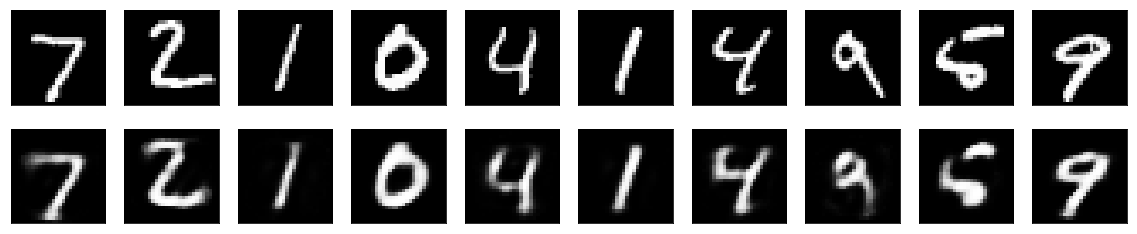

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
score = autoencoder.evaluate(x_test, x_test)

10000/10000 [==============================] - 0s 30us/step


In [16]:
score

0.10281121414899826

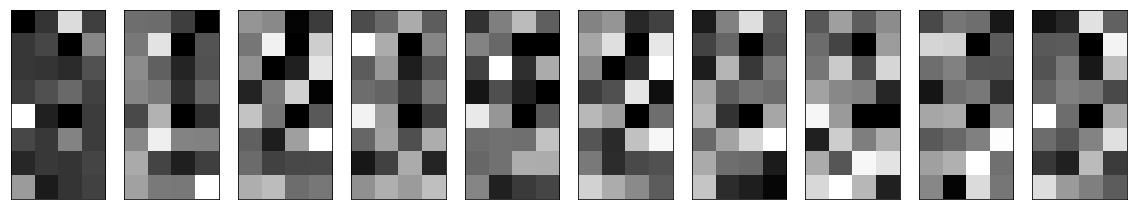

In [17]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep FNN autoencoder

In [16]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [18]:
deep_autoencoder = Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [19]:
deep_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.3359 - val_loss: 0.2629
Epoch 2/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2551 - val_loss: 0.2463
Epoch 3/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2368 - val_loss: 0.2256
Epoch 4/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.2183 - val_loss: 0.2101
Epoch 5/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2064 - val_loss: 0.1996
Epoch 6/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.1941 - val_loss: 0.1864
Epoch 7/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.1833 - val_loss: 0.1788
Epoch 8/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1753 - val_loss: 0.1707
Epoch 9/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1684 - val_loss: 0.1

In [20]:
# this model maps an input to its encoded representation
deep_encoder = Model(input_img, encoded)

In [19]:
deep_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               101136    
Total para

In [21]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input = Input(shape=(32,))

In [22]:
deep_decoder_layers = deep_autoencoder.layers[-3](deep_encoded_input)
deep_decoder_layers = deep_autoencoder.layers[-2](deep_decoder_layers)
deep_decoder_layers = deep_autoencoder.layers[-1](deep_decoder_layers)
deep_decoder = Model(deep_encoded_input, deep_decoder_layers)

In [23]:
encoded_imgs = deep_encoder.predict(x_test)
decoded_imgs = deep_decoder.predict(encoded_imgs)

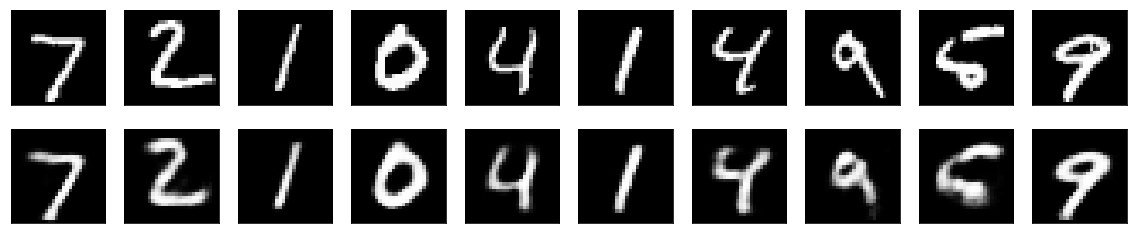

In [24]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
score = deep_autoencoder.evaluate(x_test, x_test)

10000/10000 [==============================] - 1s 89us/step


In [26]:
score

0.09725572307109832

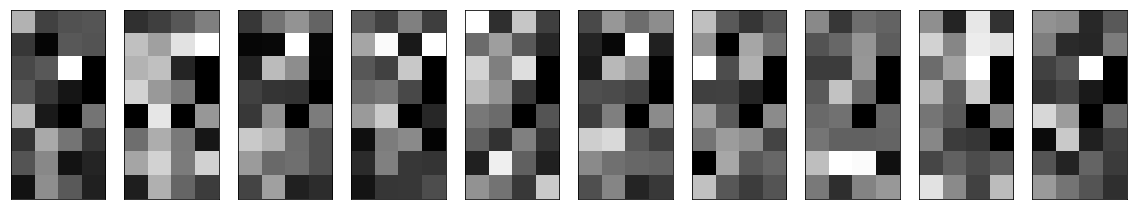

In [27]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep regularized FNN autoencoder

In [28]:
from keras import regularizers

In [29]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-7))(input_img)
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)
encoded = Dense(32, activation='relu', activity_regularizer=regularizers.l1(10e-7))(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [30]:
deep_autoencoder_l1 = Model(input_img, decoded)
deep_autoencoder_l1.compile(optimizer='adadelta', loss='binary_crossentropy')

deep_autoencoder_l1.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.4243 - val_loss: 0.2660
Epoch 2/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2606 - val_loss: 0.2579
Epoch 3/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2567 - val_loss: 0.2556
Epoch 4/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2549 - val_loss: 0.2544
Epoch 5/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2537 - val_loss: 0.2531
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2527 - val_loss: 0.2523
Epoch 7/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2518 - val_loss: 0.2512
Epoch 8/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2509 - val_loss: 0.2501
Epoch 9/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2497 - val_loss: 0.2

In [31]:
# this model maps an input to its encoded representation
deep_encoder_l1 = Model(input_img, encoded)

In [32]:
# create a placeholder for an encoded (32-dimensional) input
deep_encoded_input_l1 = Input(shape=(32,))

In [33]:
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-3](deep_encoded_input_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-2](deep_decoder_layers_l1)
deep_decoder_layers_l1 = deep_autoencoder_l1.layers[-1](deep_decoder_layers_l1)
deep_decoder_l1 = Model(deep_encoded_input_l1, deep_decoder_layers_l1)

In [34]:
encoded_imgs = deep_encoder_l1.predict(x_test)
decoded_imgs = deep_decoder_l1.predict(encoded_imgs)

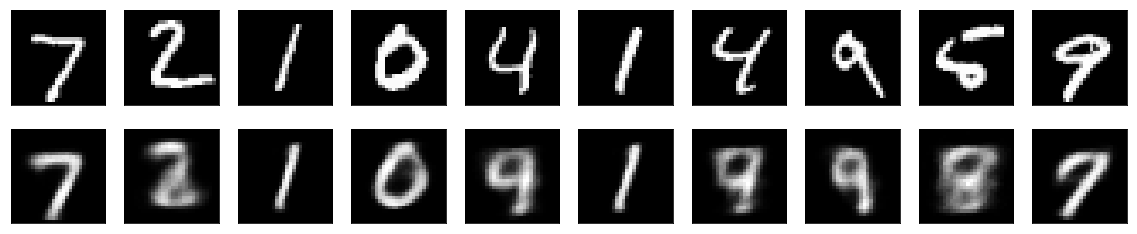

In [35]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
score = deep_autoencoder_l1.evaluate(x_test, x_test)

10000/10000 [==============================] - 1s 60us/step


In [37]:
score

0.16980867693424226

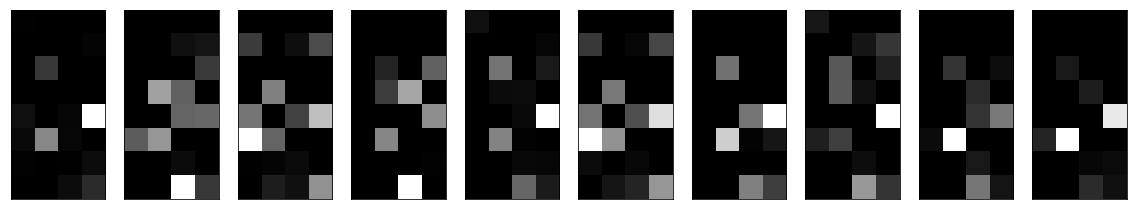

In [38]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Denoising autoencoder

In [39]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

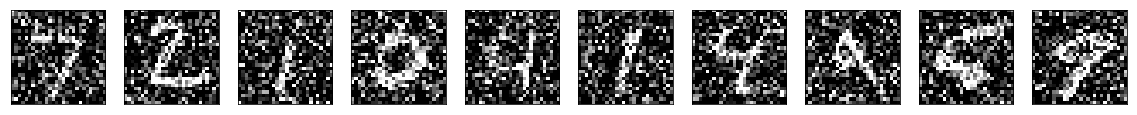

In [40]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
x_train_noisy = x_train.reshape((len(x_train_noisy), np.prod(x_train_noisy.shape[1:])))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy), np.prod(x_test_noisy.shape[1:])))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [42]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [43]:
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

denoising_autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.3374 - val_loss: 0.2614
Epoch 2/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.2558 - val_loss: 0.2598
Epoch 3/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2366 - val_loss: 0.2514
Epoch 4/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.2182 - val_loss: 0.2383
Epoch 5/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.2084 - val_loss: 0.2517
Epoch 6/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1986 - val_loss: 0.2628
Epoch 7/100
60000/60000 [==============================] - 5s 78us/step - loss: 0.1856 - val_loss: 0.2336
Epoch 8/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.1768 - val_loss: 0.2347
Epoch 9/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1708 - val_loss: 0.2

60000/60000 [==============================] - 6s 100us/step - loss: 0.1049 - val_loss: 0.2775
Epoch 78/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1047 - val_loss: 0.2543
Epoch 79/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1045 - val_loss: 0.2939
Epoch 80/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1044 - val_loss: 0.2659
Epoch 81/100
60000/60000 [==============================] - 6s 95us/step - loss: 0.1041 - val_loss: 0.2886
Epoch 82/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.1040 - val_loss: 0.2887
Epoch 83/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1038 - val_loss: 0.2719
Epoch 84/100
60000/60000 [==============================] - 6s 94us/step - loss: 0.1036 - val_loss: 0.2723
Epoch 85/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.1034 - val_loss: 0.2648
Epoch 86/100
60000/60000 [=======================

In [44]:
denoising_encoder = Model(input_img, encoded)
denoising_input = Input(shape=(32,))
denoising_decoder_layers = denoising_autoencoder.layers[-3](denoising_input)
denoising_decoder_layers = denoising_autoencoder.layers[-2](denoising_decoder_layers)
denoising_decoder_layers = denoising_autoencoder.layers[-1](denoising_decoder_layers)
denoising_decoder = Model(denoising_input, denoising_decoder_layers)

encoded_imgs = denoising_encoder.predict(x_test_noisy)
decoded_imgs = denoising_decoder.predict(encoded_imgs)

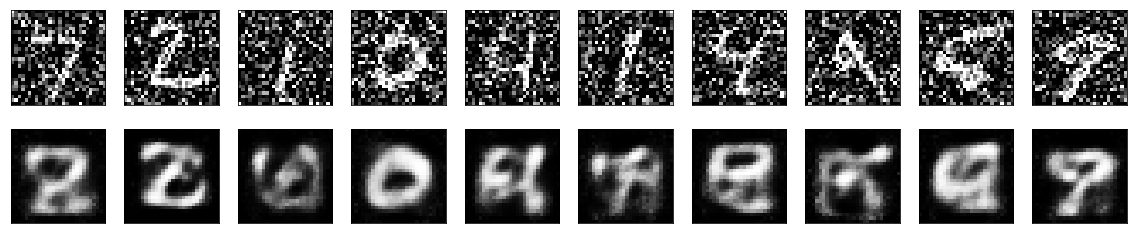

In [45]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### What´s next?

* Convolutional autoencoders
* Sequence-to-sequence autoencoder
* Variational autoencoders (VAE)
* GANs